### EDA using Univariate Analysis
#### Source
    https://www.youtube.com/watch?v=4HyTlbHUKSw&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=21
    https://github.com/campusx-official/100-days-of-machine-learning/tree/main/day20-univariate-analysis

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
%pip install seaborn

In [49]:
results = pd.read_csv('./data/stack-overflow-survey-2023/survey_results_public.csv', index_col='ResponseId')
schema = pd.read_csv('./data/stack-overflow-survey-2023/survey_results_schema.csv')

In [7]:
print(results.shape)
print(schema.shape)

(89184, 83)
(78, 6)


In [8]:
results.sample(15)

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
84343,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other;Codecademy;Pluralsight,...,Never,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,NaN,Too long,Neither easy nor difficult,180000.0
69856,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,Codecademy;Udemy,...,Never,3-5 times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices,"Information Services, IT, Software Development...",Appropriate in length,Easy,35340.0
67384,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;On the job training;Other online res...,Blogs with tips and tricks;Click to write Choi...,NaN,...,1-2 times a week,1-2 times a week,Never,30-60 minutes a day,30-60 minutes a day,NaN,"Information Services, IT, Software Development...",Too short,Easy,144448.0
5268,I agree,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,15-30 minutes a day,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
4187,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Udemy;Pluralsight,...,NaN,1-2 times a week,Never,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,NaN
26893,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hackathons (virtual or in-person);Online Cours...,NaN,NaN,...,6-10 times a week,6-10 times a week,Never,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,Other,Appropriate in length,Easy,150000.0
20146,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;Udemy;Pluralsight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,93104.0
32439,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",How-to videos;Written Tutorials;Stack Overflow...,NaN,...,1-2 times a week,Never,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Continuous integ...,Financial Services,Appropriate in length,Easy,6058.0
53402,I agree,I am a deve

In [9]:
schema.head(78)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


### Categorical Data, EDA

In [22]:
results.nunique()

Q120                      1
MainBranch                6
Age                       8
Employment              106
RemoteWork                3
                       ... 
ProfessionalTech        284
Industry                 12
SurveyLength              3
SurveyEase                3
ConvertedCompYearly    8784
Length: 83, dtype: int64

In [136]:
industry = results['Industry'].str.replace('Information Services, IT, Software Development, or other Technology','IT')
industry.value_counts()

Industry
IT                                                18159
Financial Services                                 4421
Other                                              4011
Manufacturing, Transportation, or Supply Chain     2607
Healthcare                                         2216
Retail and Consumer Services                       1955
Higher Education                                   1242
Advertising Services                                786
Insurance                                           707
Oil & Gas                                           276
Legal Services                                      210
Wholesale                                           184
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Industry'>

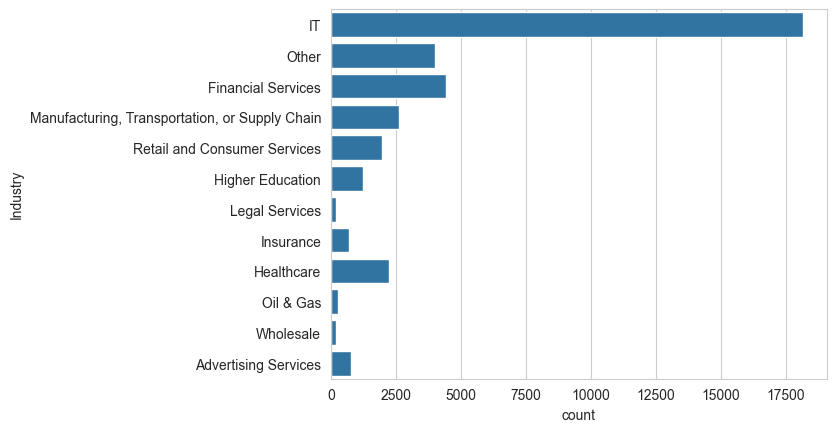

In [149]:
sns.countplot(industry)

<Axes: ylabel='count'>

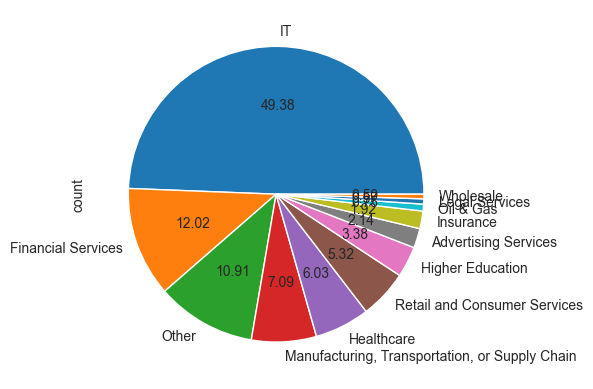

In [148]:
industry.value_counts().plot(kind='pie', autopct='%.2f')

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          41.724165
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       23.351483
Some college/university study without earning a degree                                13.359781
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.113330
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         4.418401
Associate degree (A.A., A.S., etc.)                                                    3.190752
Primary/elementary school                                                              2.165437
Something else                                                                         1.676651
Name: proportion, dtype: float64


<Axes: xlabel='count', ylabel='EdLevel'>

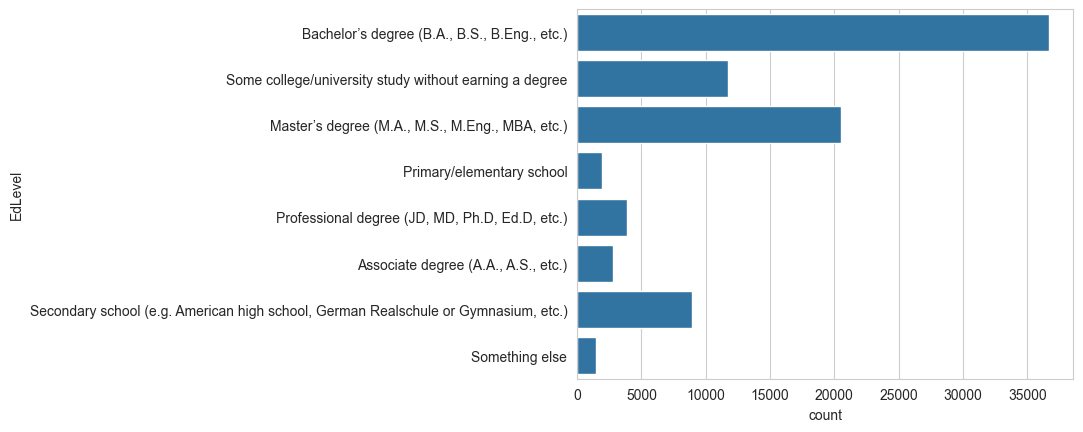

In [192]:
edLevel = results['EdLevel'].value_counts(normalize=True) * 100
print(edLevel)
sns.countplot(results['EdLevel'])

<Axes: ylabel='proportion'>

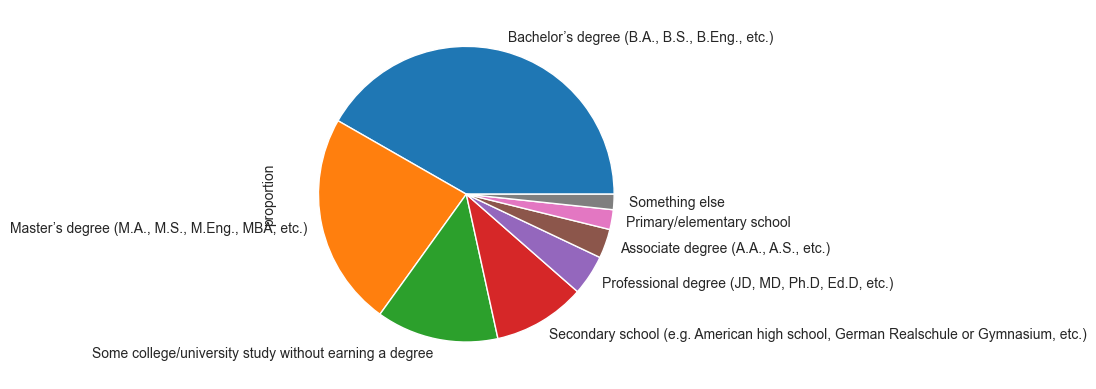

In [191]:
edLevel.plot(kind='pie')